<a href="https://colab.research.google.com/github/codewithsreenivas/HealthInsurancePremiemPridiction/blob/main/Health_Insurance_Premiem_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# import the necessary libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [32]:
# import the data

In [33]:
data = pd.read_csv('Health_insurance.csv')

In [34]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [35]:
type(data)

pandas.core.frame.DataFrame

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# data['sex'].value_counts()

In [ ]:
# There are no null values.

In [ ]:
# plot using plotly.

In [37]:
import plotly.express as px
fig = px.histogram(data, x = 'sex', color = 'smoker', title = 'Number of people who smoke')
fig.update_layout(width = 500)
fig.show()

In [38]:
# help(px.histogram)

In [39]:
# converting categorical data to numeric data using labelencoding

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()

In [42]:
temp = ['sex','smoker']

In [43]:
for i in temp:
    data[i] = le.fit_transform(data[i])

In [44]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [45]:
# Using a pie chart, let us find out the people staying in the particular region

In [46]:
import plotly.express as px

vcount = data['region'].value_counts()
val = vcount.values
ind = vcount.index
fig = px.pie(data, values = val, names =  ind)
fig.update_layout(width = 500, height = 500)
fig.show()

# fig = px.pie(data, )

In [ ]:
# help(px.pie)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [ ]:
# Now, let us convert the other categorical feature to numerical using label encoding

In [48]:
data['region'] = le.fit_transform(data['region'])

In [49]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [50]:
# Let us find the correlation of the features using corr()

In [51]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [ ]:
# Let us plot this using heatmap

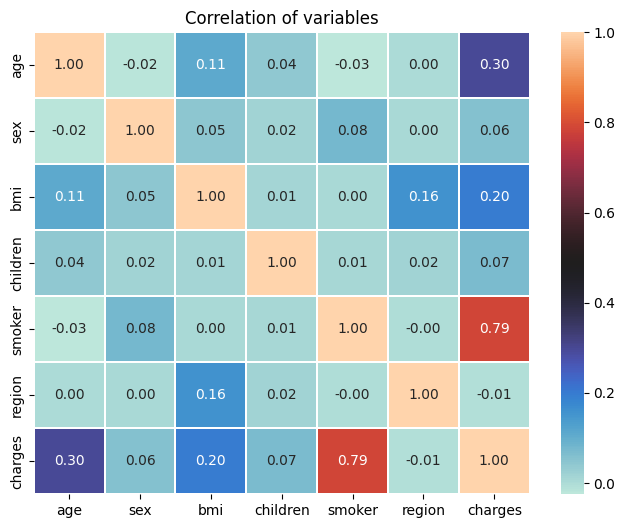

In [52]:
plt.figure(figsize = (8, 6))
sns.heatmap(data.corr(), cmap = 'icefire', annot = True, fmt = '.2f', linewidths = 0.1)
plt.title('Correlation of variables')
plt.show()

In [ ]:
# help(sns.heatmap)

In [ ]:
# Now let us train the data using train_test_split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [55]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [56]:
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [58]:
# help(train_test_split)

In [59]:
# We will use ensemble learning - RandomForestRegressor to build a prediction model.

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
rfr = RandomForestRegressor()

In [66]:
rfr.fit(xtrain, ytrain)

RandomForestRegressor()

In [67]:
ypred = rfr.predict(xtest)
ypred

array([11049.866122  ,  5001.2545845 , 28436.259273  , 10433.0866235 ,
       34724.9605858 ,  9207.5615914 ,  2153.7546275 , 14301.842856  ,
        5687.5525915 , 11266.9359186 , 19579.2672503 ,  7007.90898   ,
        4479.0142209 , 45931.4440925 , 48330.7631188 , 45134.3360072 ,
        9956.0234046 , 43157.8533908 ,  9294.5375262 , 22979.1591392 ,
        5389.6382197 , 10200.920095  ,  3048.236     ,  2598.541677  ,
       12192.5204734 , 12046.7743984 , 13246.0168292 ,  7186.7647581 ,
       10492.6743917 ,  4679.19113117,  7642.8481535 , 12086.4340128 ,
        2336.7775209 ,  5431.550675  ,  3405.0759367 , 11189.2827527 ,
        2573.6942381 ,  8481.8172636 , 23773.9231755 , 39308.0915279 ,
        7520.021976  ,  4485.2394862 , 14367.3858103 , 14801.0083625 ,
        5922.7087824 , 16609.6120533 , 17137.4045071 ,  5894.0463268 ,
       41982.0481038 ,  6034.930573  , 13853.0022885 ,  1750.657314  ,
        7017.0255029 ,  1740.313345  , 12293.1141499 , 10845.1331651 ,
      

In [68]:
data1 = pd.DataFrame({'Predicted Amount' : ypred, 'Actual Amount' : ytest})

In [69]:
data1

,Predicted Amount,Actual Amount
764,11049.866122,9095.06825
887,5001.254585,5272.17580
890,28436.259273,29330.98315
1293,10433.086623,9301.89355
259,34724.960586,33750.29180
...,...,...
109,47222.843073,47055.53210
575,12274.735089,12222.89830
535,6356.652731,6067.12675
543,46724.621377,63770.42801


In [70]:
len(ytest)

268

In [71]:
len(ypred)

268

In [ ]:
# Let us use the right matrix to evaluate the performance of our model. Here, we will use R2 score for RandomForestRegression
# model

In [72]:
from sklearn.metrics import r2_score

In [76]:
r2_score(ytest, ypred)

0.8658810429227346

In [ ]:
# My premium price predictor ML model is 86.59% accurate.

In [ ]:
# Let us manually check a case.

In [79]:
manual = [[19, 0, 27.900, 0, 1, 3]]

In [80]:
manual_pred = rfr.predict(manual)
manual_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([17054.5480825])

In [81]:
manual2 = [[32, 1, 28.880, 0, 0, 1]]

In [82]:
manual2_pred = rfr.predict(manual2)
manual2_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([3942.7906505])

In [84]:
manual3 = [[33, 0, 25.800, 2, 0, 1]]

In [85]:
manual3_pred = rfr.predict(manual3)
manual3_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([6518.65896])